<a href="https://colab.research.google.com/github/patrycjaskowronska/UMWF/blob/main/case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

In [51]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [52]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
# Liczba filmów Sci-Fi
scifi_movies = movies['genres'].str.contains('Sci-Fi').sum()
print(scifi_movies)

980


In [54]:
movie_ratings = ratings.merge(movies, on='movieId')
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [55]:
comedy_movies = movie_ratings.loc[movie_ratings['genres'].str.contains('Comedy')]
comedy_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


<ipython-input-56-b8293690485c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=comedy_movies, palette="viridis")


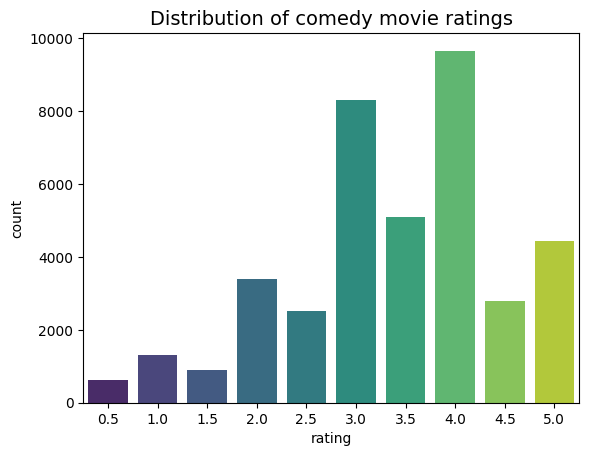

In [56]:
# Rozkład ocen komedii
sns.countplot(x="rating", data=comedy_movies, palette="viridis")
plt.title("Distribution of comedy movie ratings", fontsize=14)
plt.show()

In [57]:
# Średnia ocen wszystkich filmów akcji
action_movies = movie_ratings.loc[movie_ratings['genres'].str.contains('Action')]
print(round(action_movies['rating'].mean(),2))

3.45


In [58]:
action_movies

,userId,movieId,rating,timestamp,title,genres
267,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
268,6,6,4.0,845553757,Heat (1995),Action|Crime|Thriller
269,11,6,5.0,902154266,Heat (1995),Action|Crime|Thriller
270,18,6,4.0,1460138360,Heat (1995),Action|Crime|Thriller
271,23,6,4.0,1107342267,Heat (1995),Action|Crime|Thriller
...,...,...,...,...,...,...
100826,610,147662,3.0,1479544214,Return of the One-Armed Swordsman (1969),Action|Adventure
100830,610,158721,3.5,1479542491,Gen-X Cops (1999),Action|Comedy|Thriller
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama


In [59]:
# 3 najwyżej oceniane filmy akcji
mean_ratings = action_movies.groupby('title')['rating'].mean().reset_index()
action_movies_sorted = mean_ratings.sort_values(by='rating', ascending=False)
action_movies_sorted.head(3)

,title,rating
909,Knock Off (1998),5.0
1168,On the Other Side of the Tracks (De l'autre cô...,5.0
1460,Sonatine (Sonachine) (1993),5.0


In [60]:
!pip install surprise
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNWithMeans
from surprise import Dataset
from surprise import Reader

In [61]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [62]:
# Get minimum and maximum rating from the dataset
min_rating = ratings.rating.min()
max_rating = ratings.rating.max()

reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(movie_ratings[['userId', 'movieId', 'rating']], reader)

In [63]:
svd_model = SVD()

In [64]:
# Walidacja krzyżowa dla SVD
svd_cv = cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8786  0.8650  0.8667  0.8717  0.8749  0.8566  0.8743  0.8553  0.8675  0.8638  0.8674  0.0073  
MAE (testset)     0.6744  0.6650  0.6650  0.6631  0.6723  0.6585  0.6698  0.6596  0.6642  0.6668  0.6659  0.0049  
Fit time          2.67    1.34    1.30    1.31    1.31    1.32    1.28    1.47    1.42    1.30    1.47    0.40    
Test time         1.30    0.05    0.04    0.05    0.04    0.04    0.04    0.06    0.04    0.04    0.17    0.38    


In [65]:
# Algorytm KNNWithMeans różni się od standardowego KNN tym, że uwzględnia średnią wartość ocen dla sąsiadów w procesie predykcji
knn_model = KNNWithMeans

In [66]:
# GridSearchCV dla KNN
param_grid_knn = {'k': [2, 3, 4, 5, 6]}

grid = GridSearchCV(knn_model, param_grid_knn)
grid.fit(data)

print(grid.best_params)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [67]:
# Walidacja krzyżowa dla KNN
knn_cv = cross_validate(KNNWithMeans(k=6), data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9206  0.9096  0.9248  0.9108  0.8984  0.9254  0.9219  0.9177  0.9149  0

In [68]:
# Porównanie algorytmów pod względem czasu uczenia oraz wylosowanych błędów
print("Średni czas uczenia (SVD):", np.mean(svd_cv['fit_time']))
print("Średni czas uczenia (KNN):", np.mean(knn_cv['fit_time']))

print("Średni RMSE (SVD):", np.mean(svd_cv['test_rmse']))
print("Średni RMSE (KNN):", np.mean(knn_cv['test_rmse']))

print("Średni MAE (SVD):", np.mean(svd_cv['test_mae']))
print("Średni MAE (KNN):", np.mean(knn_cv['test_mae']))

Średni czas uczenia (SVD): 1.4725638628005981
Średni czas uczenia (KNN): 0.13940467834472656
Średni RMSE (SVD): 0.8674428047407241
Średni RMSE (KNN): 0.9160470793249962
Średni MAE (SVD): 0.6658587202379215
Średni MAE (KNN): 0.7043182534901643


Algorytm SVD cechuje się dłuższym czasem uczenia w porównaniu do algorytmu KNNWithMeans, natomiast zarówno wartości RMSE jak i MAE dla SVD są niższe niż w przypadku drugiego algorytmu.